Importing

In [1]:
import pandas as pd
from matplotlib import pyplot as plt 
import numpy as np 
import seaborn as sns
plt.style.use('seaborn-pastel')

In [2]:
df1 = pd.read_csv('../data/zippedData/tn.movie_budgets.csv.gz')
df2 = pd.read_csv('../data/zippedData/imdb.title.basics.csv.gz')
df3 = pd.read_csv('../data/zippedData/imdb.title.ratings.csv.gz')

Exploring dataset1- df1

In [3]:
df1.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [4]:
df1.dtypes

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

In [5]:
df1.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [6]:
df1['movie'].duplicated().sum()

84

In [7]:
pd.set_option('display.max_rows', 165)

In [8]:
df1['duplit'] = df1.movie.duplicated(keep=False)
df1[df1['duplit'] == True].sort_values(by = ['movie']).head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,duplit
4270,71,"Dec 23, 1954","20,000 Leagues Under the Sea","$5,000,000","$28,200,000","$28,200,000",True
5614,15,"Dec 24, 1916","20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000",True
1648,49,"Apr 30, 2010",A Nightmare on Elm Street,"$35,000,000","$63,075,011","$117,729,621",True
5016,17,"Nov 9, 1984",A Nightmare on Elm Street,"$1,800,000","$25,504,513","$25,504,513",True
2032,33,"Nov 11, 1992",Aladdin,"$28,000,000","$217,350,219","$504,050,219",True


When I checked for any duplicates, it seemed like there were 84 duplicates in 'movie' column. After inspecting all the rows with same 'movie', it seems like realase date was different. Therefore, no actual duplicates in this dataset.

Cleaning Dataset1

In [9]:
df1['production_budget'] = df1['production_budget'].str.replace(',', '')
df1['production_budget'] = df1['production_budget'].str.replace('$', '')
df1['production_budget'] = df1['production_budget'].astype(int)

In [10]:
df1['domestic_gross'] = df1['domestic_gross'].str.replace(',', '')
df1['domestic_gross'] = df1['domestic_gross'].str.replace('$', '')
df1['domestic_gross'] = df1['domestic_gross'].astype(int)

In [11]:
df1['worldwide_gross'] = df1['worldwide_gross'].str.replace(',', '')
df1['worldwide_gross'] = df1['worldwide_gross'].str.replace('$', '')
df1['worldwide_gross'] = df1['worldwide_gross'].astype('int64')

In [12]:
total_gross = df1['domestic_gross'] + df1["worldwide_gross"]

In [13]:
df1["total_gross"] = total_gross

In [14]:
df1.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,duplit,total_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,False,3536852904
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,False,1286727750
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,False,192524700
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,False,1862019831
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,False,1936903129


In [15]:
net_gross = df1['total_gross'] - df1["production_budget"]

In [16]:
df1["net_gross"] = net_gross

In [17]:
df1.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,duplit,total_gross,net_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,False,3536852904,3111852904
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,False,1286727750,876127750
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,False,192524700,-157475300
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,False,1862019831,1531419831
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,False,1936903129,1619903129


In [18]:
df1.drop(['duplit'], axis=1, inplace=True)

In [19]:
df1.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,net_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3536852904,3111852904
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1286727750,876127750
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,192524700,-157475300
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1862019831,1531419831
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1936903129,1619903129


In [20]:
df1.describe()

,id,production_budget,domestic_gross,worldwide_gross,total_gross,net_gross
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03,5.782000e+03,5.782000e+03
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07,1.333608e+08,1.017730e+08
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08,2.399411e+08,2.108880e+08
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00,0.000000e+00,-1.574753e+08
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06,6.448924e+06,-3.098222e+05
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07,4.605855e+07,2.499538e+07
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07,1.506937e+08,1.111648e+08
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09,3.536853e+09,3.111853e+09


In [21]:
pd.set_option('display.float_format', lambda x: '%1f' % x) #remove scientific notation

In [22]:
df1.sort_values(by='production_budget', ascending=False).head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,net_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3536852904,3111852904
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1286727750,876127750
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,192524700,-157475300
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1862019831,1531419831
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1936903129,1619903129


In [23]:
df1.sort_values(by='total_gross', ascending=False).head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,net_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3536852904,3111852904
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2989973445,2683973445
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2867572339,2667572339
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,2726949682,2426949682
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,2301125489,2086125489


In [24]:
df1.sort_values(by='domestic_gross', ascending=False).head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,net_gross
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2989973445,2683973445
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3536852904,3111852904
41,42,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,2048317790,1848317790
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,2726949682,2426949682
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2867572339,2667572339


In [25]:
df1.sort_values(by='worldwide_gross', ascending=False).head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,net_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3536852904,3111852904
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2867572339,2667572339
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2989973445,2683973445
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,2726949682,2426949682
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,2301125489,2086125489


In [26]:
df1.sort_values(by='net_gross', ascending=False).head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,net_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3536852904,3111852904
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2989973445,2683973445
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2867572339,2667572339
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,2726949682,2426949682
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,2301125489,2086125489


In [27]:
df1.sort_values(by='net_gross', ascending=False).tail()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,net_gross
480,81,"Dec 31, 2019",Army of the Dead,90000000,0,0,0,-90000000
479,80,"Dec 13, 2017",Bright,90000000,0,0,0,-90000000
341,42,"Jun 14, 2019",Men in Black: International,110000000,3100000,3100000,6200000,-103800000
194,95,"Dec 31, 2020",Moonfall,150000000,0,0,0,-150000000
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,192524700,-157475300


From the describe, we already know there were some 0 values.
Let's see if I could drop rows with 0 values

In [28]:
len(df1.loc[df1['total_gross']<1])

367

In [29]:
len(df1.loc[df1['domestic_gross']<1])

548

In [30]:
len(df1.loc[df1['worldwide_gross']<1])

367

In [31]:
367/len(df1)

0.06347284676582497

dropping 6%

In [32]:
budget = df1[df1.total_gross != 0]

In [33]:
budget.describe()

,id,production_budget,domestic_gross,worldwide_gross,total_gross,net_gross
count,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000
mean,50.227701,33308006.085319,44711279.029548,97687996.114681,142399275.144229,109091269.058910
std,28.765167,42487580.302756,69609893.857975,178859114.219999,245330485.894437,215938947.602956
min,1.000000,1100.000000,0.000000,26.000000,26.000000,-157475300.000000
25%,25.000000,6000000.000000,3160708.000000,7004834.000000,11386162.000000,707519.000000
50%,50.000000,19000000.000000,20300218.000000,33339868.000000,54200060.000000,31707417.000000
75%,75.000000,42000000.000000,55782491.500000,104459004.000000,161210344.500000,121778539.000000
max,100.000000,425000000.000000,936662225.000000,2776345279.000000,3536852904.000000,3111852904.000000


In [34]:
df1['release_date']= pd.to_datetime(df1['release_date'])

In [35]:
df1.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,net_gross
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,3536852904,3111852904
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1286727750,876127750
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,192524700,-157475300
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1862019831,1531419831
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,1936903129,1619903129


In [36]:
df1.sort_values(by='release_date', ascending=True).head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,net_gross
5677,78,1915-02-08,The Birth of a Nation,110000,10000000,11000000,21000000,20890000
5523,24,1916-09-05,Intolerance,385907,0,0,0,-385907
5614,15,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,16000000,15800000
5683,84,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,6000000,5900000
5606,7,1925-11-19,The Big Parade,245000,11000000,22000000,33000000,32755000


In [37]:
budget.dtypes

id                    int64
release_date         object
movie                object
production_budget     int32
domestic_gross        int32
worldwide_gross       int64
total_gross           int64
net_gross             int64
dtype: object

In [38]:
neg = (budget['net_gross'] < 0).sum().sum()
print(neg)
(neg/5415)*100 

1241


22.91782086795937

In [39]:
pos = (budget['net_gross'] > 0).sum().sum()
print(pos)
(pos/5415)*100

4174


77.08217913204064

77% of the movie made margins

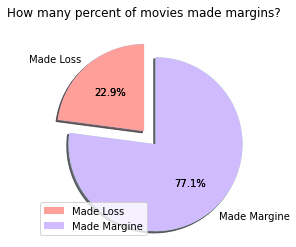

<Figure size 432x288 with 0 Axes>

In [40]:
import matplotlib.pyplot as plt
 
labels = 'Made Loss','Made Margine'
sizes = [(neg/5415)*100 , (pos/5415)*100]
 

fig1, ax1 = plt.subplots(figsize=(5,4))
explode = (0, 0.2) 


ax1.pie(sizes, explode=explode, labels=labels,autopct='%1.1f%%', shadow=True, startangle=90)
patches, texts, auto = ax1.pie(sizes,  shadow=True, startangle=90,explode=explode, autopct='%1.1f%%' )
 
plt.legend(patches, labels, loc="lower left")
plt.title("How many percent of movies made margins?")
plt.show()
plt.savefig('output.png', dpi=300, bbox_inches='tight')

In [41]:
df2.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.000000,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.000000,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.000000,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,nan,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.000000,"Comedy,Drama,Fantasy"


In [42]:
df2.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


In [43]:
df3.head()

,tconst,averagerating,numvotes
0,tt10356526,8.300000,31
1,tt10384606,8.900000,559
2,tt1042974,6.400000,20
3,tt1043726,4.200000,50352
4,tt1060240,6.500000,21


In [44]:
df3.describe()

,averagerating,numvotes
count,73856.000000,73856.000000
mean,6.332729,3523.662167
std,1.474978,30294.022971
min,1.000000,5.000000
25%,5.500000,14.000000
50%,6.500000,49.000000
75%,7.400000,282.000000
max,10.000000,1841066.000000


In [45]:
(df2.duplicated(['tconst'])).value_counts()

False    146144
dtype: int64

In [46]:
(df3.duplicated(['tconst'])).value_counts()

False    73856
dtype: int64

'tconst' is a unique identifier

In [47]:
imdb = pd.merge(df2, df3, how='inner', on='tconst')

In [48]:
imdb.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.000000,"Action,Crime,Drama",7.000000,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.000000,"Biography,Drama",7.200000,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.000000,Drama,6.900000,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,nan,"Comedy,Drama",6.100000,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.000000,"Comedy,Drama,Fantasy",6.500000,119


In [49]:
df2.loc[df2['tconst'] == "tt0063540"]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.000000,"Action,Crime,Drama"


In [50]:
df3.loc[df3['tconst'] == "tt0063540"]

,tconst,averagerating,numvotes
36049,tt0063540,7.000000,77


In [51]:
imdb.loc[imdb['tconst'] == "tt0063540"]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.000000,"Action,Crime,Drama",7.000000,77


Checking duplicates of the merged dfs

In [52]:
(imdb.duplicated(['primary_title'])).value_counts()

False    69993
True      3863
dtype: int64

In [53]:
(imdb.duplicated(['start_year'])).value_counts()

True     73846
False       10
dtype: int64

In [54]:
(imdb.duplicated(['primary_title', 'start_year'])).value_counts()

False    73271
True       585
dtype: int64

In [55]:
df = imdb.sort_values(by=['primary_title', 'numvotes'], ascending = False)

In [56]:
df[(df.duplicated(['primary_title', 'start_year'], keep=False))]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
56862,tt5815346,Zoom,Zoom,2016,158.000000,"Comedy,Drama,Romance",7.200000,85
62945,tt6667868,Zoom,Zoom,2016,nan,Horror,5.400000,17
49080,tt4842680,Zeus,Zeus,2016,115.000000,"Biography,Drama,History",6.500000,44
58771,tt6066078,Zeus,Zeus,2016,105.000000,Drama,7.300000,30
23668,tt2380333,Worm,Worm,2013,93.000000,"Horror,Romance,Sci-Fi",6.200000,85
...,...,...,...,...,...,...,...,...
44816,tt4312624,21 Days,21 den,2014,70.000000,Documentary,6.000000,5
43070,tt4119270,1989,1989,2014,97.000000,"Documentary,History,Thriller",7.500000,175
39371,tt3735338,1989,1989,2014,54.000000,Documentary,6.800000,5
12111,tt1855110,180,180,2011,121.000000,"Drama,Romance",6.000000,688


numvotes are bigger in first of the duplicate.

In [57]:
# If I keep first of the duplicates
1135/2

567.5

In [58]:
567.5/len(imdb)

0.0076838713171577125

In [59]:
df.drop_duplicates(['primary_title', 'start_year'], keep = 'first', inplace = True)

In [60]:
(df.duplicated(['primary_title', 'start_year'])).value_counts()

False    73271
dtype: int64

In [61]:
df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
45325,tt4373884,Šiška Deluxe,Siska Deluxe,2015,108.000000,"Comedy,Drama",6.300000,384
36816,tt3509772,ärtico,ärtico,2014,78.000000,Drama,6.600000,101
52301,tt5217114,à propos: philosophie,à propos: philosophie,2016,80.000000,Documentary,8.200000,5
45685,tt4422510,"Üç, Iki, Bir... Kestik!","Üç, Iki, Bir... Kestik!",2014,92.000000,Comedy,4.300000,88
71004,tt8514766,Üç Harflilerin Musallat Oldugu Büyülü Konakta ...,Üç Harflilerin Musallat Oldugu Büyülü Konakta ...,2018,80.000000,"Comedy,Horror,Thriller",4.800000,51


In [62]:
genre_a = df.drop(columns = ['tconst', 'original_title', 'start_year', 'runtime_minutes'])

In [63]:
genre_a.head()

,primary_title,genres,averagerating,numvotes
45325,Šiška Deluxe,"Comedy,Drama",6.300000,384
36816,ärtico,Drama,6.600000,101
52301,à propos: philosophie,Documentary,8.200000,5
45685,"Üç, Iki, Bir... Kestik!",Comedy,4.300000,88
71004,Üç Harflilerin Musallat Oldugu Büyülü Konakta ...,"Comedy,Horror,Thriller",4.800000,51


In [64]:
genre_a = genre_a.sort_values(by=['numvotes'], ascending = False)

In [65]:
genre_a.head()

,primary_title,genres,averagerating,numvotes
2387,Inception,"Action,Adventure,Sci-Fi",8.800000,1841066
2241,The Dark Knight Rises,"Action,Thriller",8.400000,1387769
280,Interstellar,"Adventure,Drama,Sci-Fi",8.600000,1299334
12072,Django Unchained,"Drama,Western",8.400000,1211405
325,The Avengers,"Action,Adventure,Sci-Fi",8.100000,1183655


In [66]:
genre_a['genres'].isna().sum() #how many null values in genres column?

792

In [67]:
796/len(genre_a) 

0.010863779667262628

In [68]:
genre_a = genre_a.dropna(subset=['genres']) # dropping null values from genres since it's only 1%

In [69]:
genre_a['genres'].isna().sum()

0

In [70]:
genre_a.dtypes 

primary_title     object
genres            object
averagerating    float64
numvotes           int64
dtype: object

In [71]:
genre_a['genre_convert'] = genre_a['genres'].str.split(',')

In [72]:
genre_a.head()

,primary_title,genres,averagerating,numvotes,genre_convert
2387,Inception,"Action,Adventure,Sci-Fi",8.800000,1841066,"[Action, Adventure, Sci-Fi]"
2241,The Dark Knight Rises,"Action,Thriller",8.400000,1387769,"[Action, Thriller]"
280,Interstellar,"Adventure,Drama,Sci-Fi",8.600000,1299334,"[Adventure, Drama, Sci-Fi]"
12072,Django Unchained,"Drama,Western",8.400000,1211405,"[Drama, Western]"
325,The Avengers,"Action,Adventure,Sci-Fi",8.100000,1183655,"[Action, Adventure, Sci-Fi]"


In [73]:
all_genres = []
for glist in genre_a['genre_convert']:
    for item in glist:
        all_genres.append(item)

In [74]:
all_genres

['Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Thriller',
 'Adventure',
 'Drama',
 'Sci-Fi',
 'Drama',
 'Western',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Biography',
 'Crime',
 'Drama',
 'Mystery',
 'Thriller',
 'Action',
 'Adventure',
 'Comedy',
 'Action',
 'Adventure',
 'Comedy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Fantasy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Drama',
 'Mystery',
 'Thriller',
 'Adventure',
 'Family',
 'Fantasy',
 'Drama',
 'Sci-Fi',
 'Thriller',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Adventure',
 'Drama',
 'Fantasy',
 'Action',
 'Adventure',
 'Fantasy',
 'Adventure',
 'Animation',
 'Comedy',
 'Adventure',
 'Drama',
 'Sci-Fi',
 'Biography',
 'Comedy',
 'Drama',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Drama',
 'Thriller',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Adventure',
 'Comedy',
 'Crime',
 'Action'

In [75]:
genres_lists = sorted(set(all_genres))

In [76]:
genres_lists

['Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Thriller',
 'War',
 'Western']

In [77]:
for col in genres_lists:
    genre_a[col] = 0

In [78]:
genre_a.head()

,primary_title,genres,averagerating,numvotes,genre_convert,Action,Adult,Adventure,Animation,Biography,...,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
2387,Inception,"Action,Adventure,Sci-Fi",8.800000,1841066,"[Action, Adventure, Sci-Fi]",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2241,The Dark Knight Rises,"Action,Thriller",8.400000,1387769,"[Action, Thriller]",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
280,Interstellar,"Adventure,Drama,Sci-Fi",8.600000,1299334,"[Adventure, Drama, Sci-Fi]",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12072,Django Unchained,"Drama,Western",8.400000,1211405,"[Drama, Western]",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
325,The Avengers,"Action,Adventure,Sci-Fi",8.100000,1183655,"[Action, Adventure, Sci-Fi]",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
for row in genre_a.index:
    for genres in genres_lists:
        if genres in genre_a['genres'][row]:
            genre_a[genres][row] = 1

<ipython-input-79-568d5ab29b5a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre_a[genres][row] = 1


In [80]:
genre_a.head()

,primary_title,genres,averagerating,numvotes,genre_convert,Action,Adult,Adventure,Animation,Biography,...,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
2387,Inception,"Action,Adventure,Sci-Fi",8.800000,1841066,"[Action, Adventure, Sci-Fi]",1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2241,The Dark Knight Rises,"Action,Thriller",8.400000,1387769,"[Action, Thriller]",1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
280,Interstellar,"Adventure,Drama,Sci-Fi",8.600000,1299334,"[Adventure, Drama, Sci-Fi]",0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
12072,Django Unchained,"Drama,Western",8.400000,1211405,"[Drama, Western]",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
325,The Avengers,"Action,Adventure,Sci-Fi",8.100000,1183655,"[Action, Adventure, Sci-Fi]",1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [81]:
genre_a.numvotes.describe()

count     72479.000000
mean       3589.322273
std       30576.647859
min           5.000000
25%          14.000000
50%          51.000000
75%         291.000000
max     1841066.000000
Name: numvotes, dtype: float64

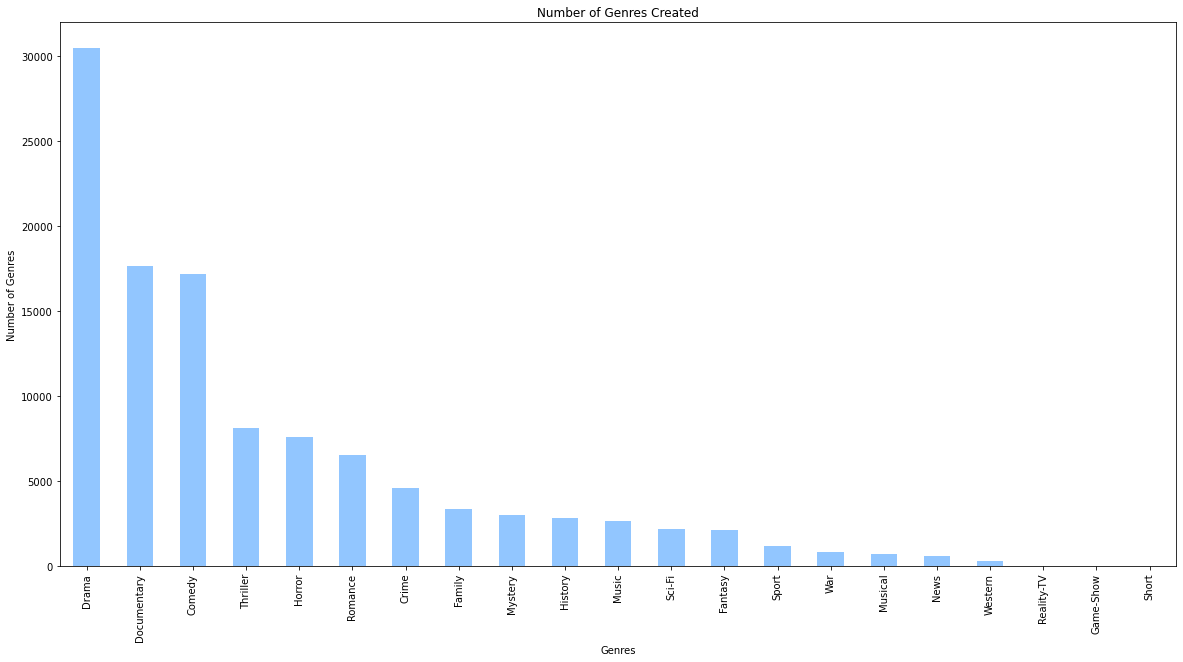

In [82]:
genre_a.iloc[:,10:].sum().sort_values(ascending = False).plot.bar(figsize = (20,10))
plt.title("Number of Genres Created")
plt.xlabel('Genres')
plt.ylabel('Number of Genres')
plt.show()

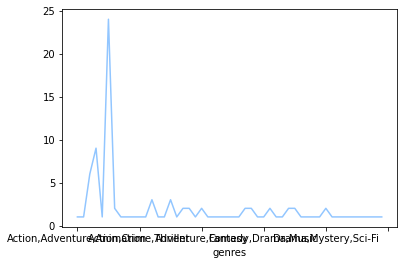

In [83]:
genre_a.head(100).groupby(by = ['genres']).count()['primary_title'].plot()

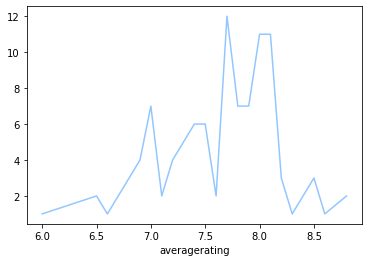

In [84]:
genre_a.head(100).groupby(by = ['averagerating']).count()['genres'].plot()

In [85]:
df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
45325,tt4373884,Šiška Deluxe,Siska Deluxe,2015,108.000000,"Comedy,Drama",6.300000,384
36816,tt3509772,ärtico,ärtico,2014,78.000000,Drama,6.600000,101
52301,tt5217114,à propos: philosophie,à propos: philosophie,2016,80.000000,Documentary,8.200000,5
45685,tt4422510,"Üç, Iki, Bir... Kestik!","Üç, Iki, Bir... Kestik!",2014,92.000000,Comedy,4.300000,88
71004,tt8514766,Üç Harflilerin Musallat Oldugu Büyülü Konakta ...,Üç Harflilerin Musallat Oldugu Büyülü Konakta ...,2018,80.000000,"Comedy,Horror,Thriller",4.800000,51


In [86]:
df.sort_values(by='start_year', ascending=True).head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
7706,tt1699720,!Women Art Revolution,Women Art Revolution,2010,83.000000,Documentary,6.900000,196
61354,tt6393474,The Secret of Taran Desert,Raz Dasht Taran,2010,76.000000,"Adventure,Family,Fantasy",4.700000,17
5649,tt1616203,One Day,You yi tian,2010,93.000000,"Drama,Romance,Sci-Fi",6.000000,436
4629,tt1568921,The Secret World of Arrietty,Kari-gurashi no Arietti,2010,94.000000,"Adventure,Animation,Family",7.600000,68266
4065,tt1535491,The Secret Reunion,Ui-hyeong-je,2010,117.000000,"Action,Drama",7.000000,3218


In [87]:
runtime = df.drop(columns = ['tconst', 'original_title', 'start_year', 'genres'])

In [88]:
runtime.head()

,primary_title,runtime_minutes,averagerating,numvotes
45325,Šiška Deluxe,108.000000,6.300000,384
36816,ärtico,78.000000,6.600000,101
52301,à propos: philosophie,80.000000,8.200000,5
45685,"Üç, Iki, Bir... Kestik!",92.000000,4.300000,88
71004,Üç Harflilerin Musallat Oldugu Büyülü Konakta ...,80.000000,4.800000,51


In [89]:
runtime.rename(columns = {'primary_title' : 'movie'}, inplace =True)

In [90]:
imdb1 = pd.merge(runtime, budget, on='movie')

In [91]:
imdb1.head()

,movie,runtime_minutes,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross,total_gross,net_gross
0,xXx: Return of Xander Cage,107.000000,5.200000,77976,15,"Jan 20, 2017",85000000,44898413,345033359,389931772,304931772
1,Zulu,110.000000,6.700000,16607,82,"Dec 31, 2013",16000000,0,1844228,1844228,-14155772
2,Zootopia,108.000000,8.000000,383446,57,"Mar 4, 2016",150000000,341268248,1019429616,1360697864,1210697864
3,Zoom,96.000000,6.100000,2323,26,"Aug 11, 2006",35000000,11989328,12506188,24495516,-10504484
4,Zoom,158.000000,7.200000,85,26,"Aug 11, 2006",35000000,11989328,12506188,24495516,-10504484


In [92]:
runtime.loc[runtime['movie'] == "Avatar"]

,movie,runtime_minutes,averagerating,numvotes
9944,Avatar,93.000000,6.100000,43


In [93]:
budget.loc[budget['movie'] == "Avatar"]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,net_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,3536852904,3111852904


In [94]:
imdb1.loc[imdb1['movie'] == "Avatar"]

,movie,runtime_minutes,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross,total_gross,net_gross
2310,Avatar,93.000000,6.100000,43,1,"Dec 18, 2009",425000000,760507625,2776345279,3536852904,3111852904


In [95]:
imdb1['movie'].isna().sum()

0

In [96]:
(imdb1.duplicated(['movie'])).value_counts()

False    1924
True      560
dtype: int64

In [97]:
imdb1.describe()

,runtime_minutes,averagerating,numvotes,id,production_budget,domestic_gross,worldwide_gross,total_gross,net_gross
count,2392.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000,2484.000000
mean,104.369565,6.323188,76038.795089,50.515298,37865188.563607,48017712.990338,114731003.243559,162748716.233897,124883527.670290
std,20.811067,1.116072,141724.635451,28.598829,49301902.020579,77280039.613784,212016437.972986,286119547.346238,250543689.781637
min,3.000000,1.600000,5.000000,1.000000,9000.000000,0.000000,26.000000,26.000000,-157475300.000000
25%,91.000000,5.700000,278.000000,26.000000,7000000.000000,2483790.000000,6756126.750000,10328806.250000,127610.000000
50%,103.000000,6.400000,17584.000000,50.000000,20000000.000000,22197550.000000,39172169.500000,62662652.000000,39518920.000000
75%,115.000000,7.100000,88527.750000,75.000000,46500000.000000,57945809.250000,116782417.000000,175262508.750000,133038359.000000
max,280.000000,9.300000,1841066.000000,100.000000,425000000.000000,760507625.000000,2776345279.000000,3536852904.000000,3111852904.000000


In [98]:
sns.displot(data=imdb1, x="release_date", col="production_budget", kde=True)

AttributeError: module 'seaborn' has no attribute 'displot'

In [ ]:
sns.displot(data=imdb1, x="production_budget", col="averagerating", kde=True)

In [ ]:
sns.pairplot(data=imdb1, hue="net_gross")

In [1]:
df1.head

NameError: name 'df1' is not defined